<a href="https://colab.research.google.com/github/DevvMeh/Dev2020/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn


In [ ]:
from __future__ import absolute_import , division , print_function , unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #basically opening the cvc file using pandas
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived') #removes the "survived " column from the dataset and is stored in y_train
y_eval = dfeval.pop('survived')

In [ ]:
dftrain.loc[10] #shows all the information of the 11th row


,10
sex,male
age,39.0
n_siblings_spouses,1
parch,5
fare,31.275
class,Third
deck,unknown
embark_town,Southampton
alone,n


<Axes: >

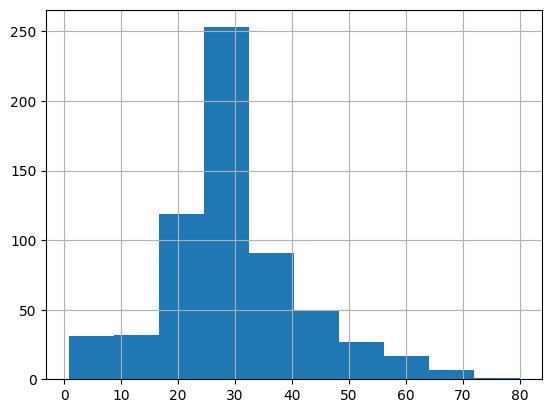

In [ ]:
dftrain.age.hist() #makes a histogram of the "age" column , this is done using matplotlib

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',          #spliting pur data into catagorical and numeric comlumns
                       'embark_town', 'alone']           #the ml model treats the data types differently
NUMERIC_COLUMNS = ['age', 'fare',]

feature_columns = []  #creating an empty set

# the model takes input in the form of numerical data
# this converts the data into a matrix form
# this is the code used to convert our data in the form in which the model can understand
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [ ]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [ ]:
# this is an input function meaning it provides the above data to a model in a form understandable by the model
# epoch=1 , meaning giving the dataset 1 time to the model
# data set is provided multiple times to the model so that it can have higher accuracy
# batch size , it cant process too much data ata single time so we provide data in small batches

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function


In [ ]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# This is an argument that defines how the input features are structured and processed before being passed to the model.
# For ex -  it tells the model - "The age feature is numeric and should be handled as such."
# "The sex feature is categorical and should be converted to one-hot encoding (or embeddings if used differently)."


linear_est.train(train_input_fn)  # train the model

result = linear_est.evaluate(eval_input_fn)# get models metric/stats by testing on testing data

clear_output()
print(result)

In [ ]:
#the above thing gives us the accuracy we tuse this for predicting survival of a person
# now we use the method .predict() to get survival probabilities from the model

pred_dicts = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[0])
print(y_eval.loc[0])
print(pred_dicts[0]["probabilities"][1])